# Batch Features

## Problem Statement

Scenario: We're a utility company providing energy to New York City. 

Goal: Every day, we want to predict the energy demand the next 3 days (each day individually) so we can optimally plan our resources.

Task: We will look at historic energy demand and create batch features that we can use to predict the future demand.

## Prerequisites

In [1]:
import pandas as pd

## Data

Let's explore our data!

In [2]:
csv_file_path = 'data/energy_data.csv'

In [3]:
# In case you want to pull this data live
# import requests
# import os

# get the EIA API key form your secrets
# API_KEY = os.environ.get('EIA_API_KEY')

# API URL
# url = "https://api.eia.gov/v2/electricity/rto/region-sub-ba-data/data/?frequency=hourly&data[0]=value&facets[subba][]=ZONJ&start=2024-01-01T00&end=2024-03-30T23&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key="+API_KEY

# Make a GET request
# response = requests.get(url)
# data = response.json()  # Decode the JSON response into a dictionary

# Extract data from the response
# energy_data = data['response']['data']
# df = pd.DataFrame(energy_data)
# df.to_csv(csv_file_path, index=False)

In [4]:
# Load DataFrame from CSV
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

# Display the DataFrame
df.head()

,subba,subba-name,parent,parent-name,value,value-units
period,,,,,,
2024-03-30 23:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4980,megawatthours
2024-03-30 22:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4892,megawatthours
2024-03-30 21:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4798,megawatthours
2024-03-30 20:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4760,megawatthours
2024-03-30 19:00:00,ZONJ,New York City,NYIS,New York Independent System Operator,4772,megawatthours


In [5]:
# Aggreggate by day:
df_daily = df.resample('D').sum("value")
df_daily

,value
period,
2024-01-01,116406
2024-01-02,128866
2024-01-03,131883
2024-01-04,131606
2024-01-05,136960
...,...
2024-03-26,125493
2024-03-27,125867
2024-03-28,125577


<Axes: xlabel='period'>

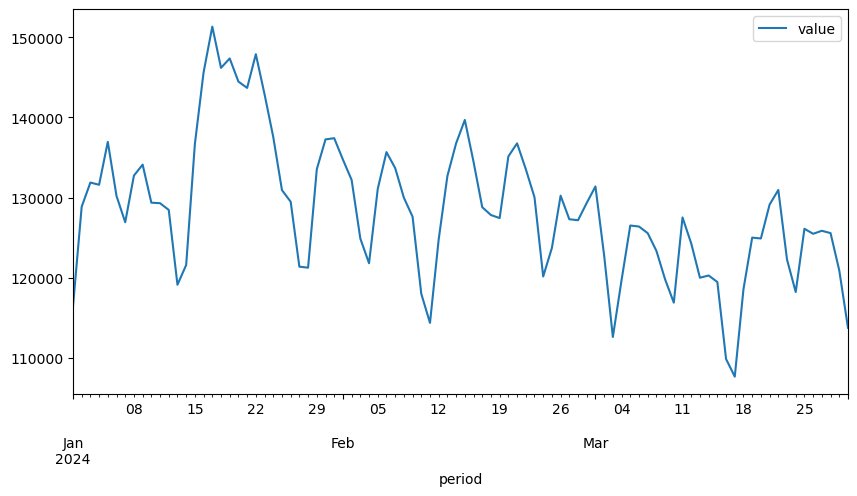

In [6]:
# Inspect time series
df_daily.plot(figsize=(10,5))

In [7]:
batch_df = pd.DataFrame()

# Lagging features
batch_df['lag_1'] = df_daily['value'].shift(1) # Energy demand -1 day

batch_df['lag_4'] = df_daily['value'].shift(4) # Energy demand +3 days - 7 days
batch_df['lag_5'] = df_daily['value'].shift(5) # Energy demand +2 days - 7 days
batch_df['lag_6'] = df_daily['value'].shift(6) # Energy demand +1 days - 7 days

batch_df['lag_11'] = df_daily['value'].shift(11) # Energy demand +3 days - 14 days
batch_df['lag_12'] = df_daily['value'].shift(12) # Energy demand +2 days - 14 days
batch_df['lag_13'] = df_daily['value'].shift(13) # Energy demand +1 days - 14 days

batch_df.head(14)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13
period,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN
2024-01-08,126933.0,131606.0,131883.0,128866.0,NaN,NaN,NaN
2024-01-09,132752.0,136960.0,131606.0,131883.0,NaN,NaN,NaN


In [8]:
# Rolling statistics
batch_df['rolling_mean_7'] = df_daily['value'].rolling(window=7).mean().round(2)
batch_df['rolling_std_7'] = df_daily['value'].rolling(window=7).std().round(2)

batch_df.head(7)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN,128981.0,6361.77


In [9]:
# Inspect target variable - it's actually 3!

# Lagging target variable
batch_df['target_1d'] = df_daily['value'].shift(-1) # Next day
batch_df['target_2d'] = df_daily['value'].shift(-2) # Second-next day
batch_df['target_3d'] = df_daily['value'].shift(-3) # Third-next day

batch_df.head(15)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
period,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128866.0,131883.0,131606.0
2024-01-02,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131883.0,131606.0,136960.0
2024-01-03,128866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131606.0,136960.0,130213.0
2024-01-04,131883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136960.0,130213.0,126933.0
2024-01-05,131606.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130213.0,126933.0,132752.0
2024-01-06,136960.0,128866.0,116406.0,NaN,NaN,NaN,NaN,NaN,NaN,126933.0,132752.0,134119.0
2024-01-07,130213.0,131883.0,128866.0,116406.0,NaN,NaN,NaN,128981.00,6361.77,132752.0,134119.0,129372.0
2024-01-08,126933.0,131606.0,131883.0,128866.0,NaN,NaN,NaN,131316.14,3182.04,134119.0,129372.0,129308.0
2024-01-09,132752.0,136960.0,131606.0,131883.0,NaN,NaN,NaN,132066.57,3126.85,129372.0,129308.0,128467.0


In [10]:
# check targets
df_daily.head(4)

,value
period,
2024-01-01,116406
2024-01-02,128866
2024-01-03,131883
2024-01-04,131606


In [11]:
# Drop NaN-values
batch_df = batch_df.dropna()
batch_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
period,,,,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62,136704.0,145628.0,151329.0
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72,145628.0,151329.0,146188.0
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19,151329.0,146188.0,147359.0
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71,146188.0,147359.0,144471.0
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85,147359.0,144471.0,143686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,130956.0,125016.0,118592.0,107680.0,124289.0,127532.0,116906.0,122652.71,7772.78,118230.0,126118.0,125493.0
2024-03-24,122277.0,124910.0,125016.0,118592.0,120013.0,124289.0,127532.0,124159.86,4864.40,126118.0,125493.0,125867.0
2024-03-25,118230.0,129138.0,124910.0,125016.0,120293.0,120013.0,124289.0,125235.00,4217.35,125493.0,125867.0,125577.0


In [12]:
# Check correlation matrix. 
# Ideally we want low correlation between features, but high correlation between features and target

corr = batch_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7,target_1d,target_2d,target_3d
lag_1,1.000000,0.302505,0.201622,0.197652,0.041389,0.036201,0.150800,0.735396,0.252377,0.491790,0.314900,0.231609
lag_4,0.302505,1.000000,0.792653,0.489499,0.389185,0.266067,0.082215,0.791467,-0.091057,0.214432,0.320147,0.414412
lag_5,0.201622,0.792653,1.000000,0.798547,0.287637,0.379447,0.238787,0.732367,-0.167635,0.318708,0.410565,0.302758
lag_6,0.197652,0.489499,0.798547,1.000000,0.199292,0.304989,0.370801,0.639983,-0.127266,0.417532,0.315702,0.148122
lag_11,0.041389,0.389185,0.287637,0.199292,1.000000,0.775969,0.440276,0.263935,0.363765,0.139937,0.362888,0.539971
lag_12,0.036201,0.266067,0.379447,0.304989,0.775969,1.000000,0.761331,0.243296,0.270173,0.346903,0.500124,0.395421
lag_13,0.150800,0.082215,0.238787,0.370801,0.440276,0.761331,1.000000,0.242832,0.117338,0.461421,0.318695,0.117222
rolling_mean_7,0.735396,0.791467,0.732367,0.639983,0.263935,0.243296,0.242832,1.000000,0.077361,0.538036,0.450516,0.393690
rolling_std_7,0.252377,-0.091057,-0.167635,-0.127266,0.363765,0.270173,0.117338,0.077361,1.000000,0.394654,0.504233,0.582894
target_1d,0.491790,0.214432,0.318708,0.417532,0.139937,0.346903,0.461421,0.538036,0.394654,1.000000,0.813661,0.546289


In [13]:
# pulling everything together

# Load DataFrame from CSV
df = pd.read_csv(csv_file_path, parse_dates=['period'])
df.set_index('period', inplace=True)

# Run the feature pipeline
from scripts import feature_processing
feature_processing.feature_pipeline(df)

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-01-14,119134.0,129372.0,134119.0,132752.0,131883.0,128866.0,116406.0,127822.29,5524.62
2024-01-15,121604.0,129308.0,129372.0,134119.0,131606.0,131883.0,128866.0,128386.86,6264.72
2024-01-16,136704.0,128467.0,129308.0,129372.0,136960.0,131606.0,131883.0,130031.00,8953.19
2024-01-17,145628.0,119134.0,128467.0,129308.0,130213.0,136960.0,131606.0,133167.71,12008.71
2024-01-18,151329.0,121604.0,119134.0,128467.0,126933.0,130213.0,136960.0,135579.14,12774.85
...,...,...,...,...,...,...,...,...,...
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13


In [15]:
feature_processing.get_targets(df)

,target_1d,target_2d,target_3d
period,,,
2024-01-01,128866.0,131883.0,131606.0
2024-01-02,131883.0,131606.0,136960.0
2024-01-03,131606.0,136960.0,130213.0
2024-01-04,136960.0,130213.0,126933.0
2024-01-05,130213.0,126933.0,132752.0
...,...,...,...
2024-03-23,118230.0,126118.0,125493.0
2024-03-24,126118.0,125493.0,125867.0
2024-03-25,125493.0,125867.0,125577.0
